In [358]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter
# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    })
plt.rcParams.update({'font.size': 14})

# zoom in box
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector 

def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

# pandas
import pandas as pd


def df2np(df, model, data):
    if data == 17:
        df = df[(df['Model'] == model) & (df['Data in k'] == 17)].iloc[0,3::2]
    if data == 35:
        df = df[(df['Model'] == model) & (df['Data in k'] == 35)].iloc[0,2::2]
    return df.to_numpy().astype(float)

grad_steps_17k = [17, 34, 51, 68 , 85, 102, 119] # every 10 epochs starting from 10
grad_steps_35k = [17.5, 52.5, 87.5, 122.5, 157.5, 192.5, 227.5] # every 10 epochs starting from 5

In [403]:
# Load validation histories
knee_df = pd.read_excel('val_hist.xlsx')

data = 35
knee_unet_8M = df2np(knee_df, 'U-Net-8M', data)
# knee_unet_31M = df2np(knee_df, 'U-Net-31M', data)
knee_unet_124M = df2np(knee_df, 'U-Net-124M', data)

knee_vit_8Mp10 = df2np(knee_df, 'ViT-8M/10', data)
knee_vit_32Mp10 = df2np(knee_df, 'ViT-32M/10', data)

knee_vit_8Mp10[0] = 0.7220 # provisorisch
knee_vit_8Mp10[1] = 0.7230 # provisorisch

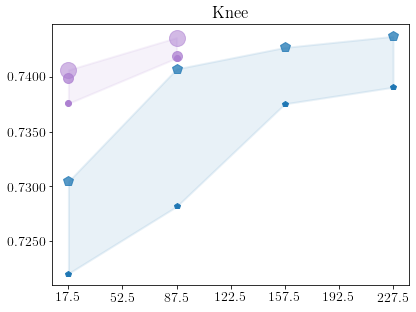

In [404]:
fig, ax = plt.subplots()
fig.set_size_inches(4*1.6, 3*1.6)

""" Plot Knee """
ms1 = 10
ms2 = 16
oc1 = 0.75
oc2 = 0.55
ax.plot([], [], 'p-', markersize=ms2, alpha=oc2, color='#1f77b4', zorder=6)
ax.plot(grad_steps_35k[::2], knee_unet_124M[::2], 'o', markersize=ms2, alpha=oc2, color='#ad80d1', zorder=3)
ax.plot(grad_steps_35k[::2], knee_vit_32Mp10[::2], 'p', markersize=ms1, alpha=oc1, color='#1f77b4', zorder=5)
ax.plot(grad_steps_35k[::2], knee_vit_8Mp10[::2], 'p', color='#1f77b4', zorder=5)
ax.plot(grad_steps_35k[::2], knee_unet_31M[::2], 'o', markersize=ms1, alpha=oc1, color='#ad80d1', zorder=2)
ax.plot(grad_steps_35k[::2], knee_unet_8M[::2], 'o', color='#ad80d1', zorder=2)

ax.fill_between(grad_steps_35k[::2], knee_unet_124M[::2],  knee_unet_8M[::2], alpha=0.1, color='#ad80d1', linewidth=2,)
ax.fill_between(grad_steps_35k[::2], knee_vit_32Mp10[::2],  knee_vit_8Mp10[::2], alpha=0.1, color='#1f77b4', linewidth=2, )

ax.set_title('Knee')
ax.set_xticks(grad_steps_35k)
# ax.set_xticklabels(['2k', '17k', '35k'])
# ax.yaxis.set_ticks(np.arange(0.72, 0.745, 0.005))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

In [405]:
# Load validation histories
knee_df = pd.read_excel('val_hist.xlsx')

data = 17
knee_unet_8M = df2np(knee_df, 'U-Net-8M', data)
knee_unet_31M = df2np(knee_df, 'U-Net-31M', data)
knee_unet_124M = df2np(knee_df, 'U-Net-124M', data)

knee_vit_8Mp10 = df2np(knee_df, 'ViT-8M/10', data)
knee_vit_32Mp10 = df2np(knee_df, 'ViT-32M/10', data)

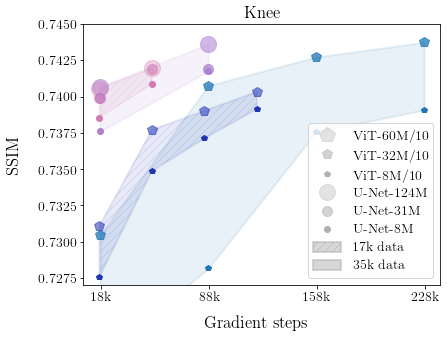

In [406]:
""" Plot Knee """
ms1 = 10
ms2 = 16
oc1 = 0.55
oc2 = 0.35
ax.plot([], [], 'p-', markersize=ms2, alpha=oc2, color='#1f33b4', zorder=6)
ax.plot(grad_steps_17k[::2], knee_unet_124M[::2], 'o', markersize=ms2, alpha=oc2, color='#d17bb2', zorder=3)
ax.plot(grad_steps_17k[::2], knee_vit_32Mp10[::2], 'p', markersize=ms1, alpha=oc1, color='#1f33b4', zorder=5)
ax.plot(grad_steps_17k[::2], knee_unet_31M[::2], 'o', markersize=ms1, alpha=oc1, color='#d17bb2', zorder=2)
ax.plot(grad_steps_17k[::2], knee_vit_8Mp10[::2], 'p', color='#1f33b4', zorder=5)
ax.plot(grad_steps_17k[::2], knee_unet_8M[::2], 'o', color='#d17bb2', zorder=2)

ax.fill_between(grad_steps_17k[::2], knee_unet_124M[::2],  knee_unet_8M[::2], alpha=0.1, color='#d17bb2', linewidth=2, hatch="///")
ax.fill_between(grad_steps_17k[::2], knee_vit_32Mp10[::2],  knee_vit_8Mp10[::2], alpha=0.1, color='#1f33b4', linewidth=2, hatch="///")

ax.set_title('Knee')
ax.set_xticks(np.array(grad_steps_35k[::2])+0.5)
ax.set_xticklabels(['18k', '88k', '158k', '228k'])
# ax.yaxis.set_ticks(np.arange(0.72, 0.745, 0.005))
ax.set_ylim([0.7270, 0.745])
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
fig.supxlabel('Gradient steps', y=-0.01)
fig.supylabel('SSIM', x=-0.04)

ax.fill_between([], [], [], alpha=0.5, color='#b0b0b0', linewidth=2, hatch="///", label='17k data')
ax.fill_between([], [], [], alpha=0.5, color='#b0b0b0', linewidth=2,  label='35k data')
ax.plot([], [], 'p', markersize=ms2, alpha=oc2, color='#b0b0b0', label='ViT-60M/10', zorder=6)
ax.plot([], [], 'p', markersize=ms1, alpha=oc1, color='#b0b0b0', label='ViT-32M/10', zorder=5)
ax.plot([], [], 'p', color='#b0b0b0', label='ViT-8M/10', zorder=4)
ax.plot([], [], 'o', markersize=ms2, alpha=oc2, color='#b0b0b0', label='U-Net-124M', zorder=3)
ax.plot([], [], 'o', markersize=ms1, alpha=oc1, color='#b0b0b0', label='U-Net-31M', zorder=2)
ax.plot([], [], 'o', color='#b0b0b0', label='U-Net-8M', zorder=1)


ax.legend(labelspacing=0.4)
fig.savefig('training_study.pdf', format="pdf",transparent=True, bbox_inches = 'tight')
fig
